In [1]:
import pandas as pd
import numpy as np
train_df=pd.read_csv('../input/feedback-prize-effectiveness/train.csv')
test_df=pd.read_csv('../input/feedback-prize-effectiveness/test.csv')
sub_df=pd.read_csv('../input/feedback-prize-effectiveness/sample_submission.csv')

In [2]:
train_df.head(10)

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate
5,36a565e45db7,007ACE74B050,"though some say that life on Mars does exist, ...",Rebuttal,Ineffective
6,fb65fe816ba3,007ACE74B050,"It says in paragraph 7, on April 5, 1998, Mars...",Evidence,Adequate
7,4e472e2584fa,007ACE74B050,Everyone who thought it was made by alieans ev...,Counterclaim,Adequate
8,28a94d3ee425,007ACE74B050,Though people were not satified about how the ...,Concluding Statement,Adequate
9,d226f06362f5,00944C693682,Limiting the usage of cars has personal and pr...,Lead,Effective


In [3]:
train_df['discourse_text'][2]

'I think that the face is a natural landform because there is no life on Mars that we have descovered yet '

In [4]:
train_df.shape

(36765, 5)

In [5]:
test_df

,discourse_id,essay_id,discourse_text,discourse_type
0,a261b6e14276,D72CB1C11673,Making choices in life can be very difficult. ...,Lead
1,5a88900e7dc1,D72CB1C11673,Seeking multiple opinions can help a person ma...,Position
2,9790d835736b,D72CB1C11673,it can decrease stress levels,Claim
3,75ce6d68b67b,D72CB1C11673,a great chance to learn something new,Claim
4,93578d946723,D72CB1C11673,can be very helpful and beneficial.,Claim
5,2e214524dbe3,D72CB1C11673,When making a decision there is a chance that ...,Evidence
6,84812fc2ab9f,D72CB1C11673,Everyone is different and may have more experi...,Evidence
7,c668ff840720,D72CB1C11673,Seeking others opinion can be very helpful and...,Claim
8,739a6d00f44a,D72CB1C11673,Taking other peoples advice and doing what the...,Evidence
9,bcfae2c9a244,D72CB1C11673,You can learn from others experiences by seeki...,Concluding Statement


In [6]:
test_df.shape

(10, 4)

In [7]:
sub_df

,discourse_id,Ineffective,Adequate,Effective
0,a261b6e14276,0.20,0.60,0.40
1,5a88900e7dc1,3.00,6.00,1.00
2,9790d835736b,1.00,2.00,3.00
3,75ce6d68b67b,0.33,0.34,0.33
4,93578d946723,0.01,0.24,0.47
5,2e214524dbe3,0.20,0.60,0.40
6,84812fc2ab9f,3.00,6.00,1.00
7,c668ff840720,1.00,2.00,3.00
8,739a6d00f44a,0.33,0.34,0.33
9,bcfae2c9a244,0.01,0.24,0.47


In [8]:
sub_df.shape

(10, 4)

In [9]:
test_df['discourse_text'][0]

"Making choices in life can be very difficult. People often ask for advice when they can not decide on one thing. It's always good to ask others for their advice when making a choice. When you have multiple opinions you have the ability to make the best choice for yourself. "

In [10]:
train_df.tail()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
36760,9f63b687e76a,FFA381E58FC6,For many people they don't like only asking on...,Claim,Adequate
36761,9d5bd7d86212,FFA381E58FC6,also people have different views and opinions ...,Claim,Adequate
36762,f1b78becd573,FFA381E58FC6,Advice is something that can impact a persons ...,Position,Adequate
36763,cc184624ca8e,FFA381E58FC6,someone can use everything that many people sa...,Evidence,Ineffective
36764,c8a973681feb,FFA381E58FC6,In conclusion asking for an opinion can be ben...,Concluding Statement,Ineffective


In [11]:
train_df=train_df.drop(columns=['discourse_id','essay_id','discourse_type'],axis=1)
train_df.head(1)

,discourse_text,discourse_effectiveness
0,"Hi, i'm Isaac, i'm going to be writing about h...",Adequate


In [12]:
train_df['discourse_effectiveness'].value_counts()

Adequate       20977
Effective       9326
Ineffective     6462
Name: discourse_effectiveness, dtype: int64

In [13]:
train_df['discourse_effectiveness']=train_df['discourse_effectiveness'].map({'Ineffective':0,'Adequate':1,'Effective':2})
train_df['discourse_effectiveness'].value_counts()

1    20977
2     9326
0     6462
Name: discourse_effectiveness, dtype: int64

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
import transformers
from transformers import DistilBertTokenizer, TFDistilBertModel
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
bert= TFDistilBertModel.from_pretrained("distilbert-base-uncased")

2022-07-16 05:43:56.880166: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2022-07-16 05:43:56.880287: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363M [00:00<?, ?B/s]

2022-07-16 05:44:13.728291: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-16 05:44:13.731335: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2022-07-16 05:44:13.731378: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-16 05:44:13.731406: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (74965335de11): /proc/driver/nvidia/version does not exist
2022-07-16 05:44:13.732607: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

In [16]:
print('max length of word',max([len(x.split()) for x in train_df['discourse_text']]))

max length of word 836


In [17]:
train_df['discourse_text'].apply(lambda x: len(x.split())).mean()

44.65407316741466

In [18]:
max_length=50

In [19]:
bert

In [20]:
tokenizer

PreTrainedTokenizer(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_len=512, is_fast=False, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [21]:
tokenizer('i love baby')

{'input_ids': [101, 1045, 2293, 3336, 102], 'attention_mask': [1, 1, 1, 1, 1]}

In [22]:
x_train=tokenizer(
      
    text=train_df['discourse_text'].tolist(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_attention_mask=False,
    verbose=True
    
    )

In [23]:
x_train

{'input_ids': <tf.Tensor: shape=(36765, 50), dtype=int32, numpy=
array([[ 101, 7632, 1010, ..., 7733, 1998,  102],
       [ 101, 2006, 2026, ..., 1037, 3019,  102],
       [ 101, 1045, 2228, ...,    0,    0,    0],
       ...,
       [ 101, 6040, 2003, ...,    0,    0,    0],
       [ 101, 2619, 2064, ..., 2027, 2215,  102],
       [ 101, 1999, 7091, ...,    0,    0,    0]], dtype=int32)>}

In [24]:
import tensorflow as tf
from tensorflow.keras import Model,layers,optimizers,callbacks,losses,metrics,utils

In [25]:
input_ids=layers.Input(shape=(max_length,),dtype=tf.int32,name='input_ids')
embedding=bert(input_ids)[0]

In [26]:
embedding[0]

<KerasTensor: shape=(50, 768) dtype=float32 (created by layer 'tf.__operators__.getitem')>

In [27]:
out=layers.GlobalMaxPool1D()(embedding)
out=layers.Dropout(0.1)(out)
out=layers.Dense(399,activation='relu')(out)

out=layers.Dropout(0.15)(out)
out=layers.Dense(67,activation='relu')(out)
out=layers.Dense(17,activation='relu')(out)
y=layers.Dense(3,activation='softmax')(out)

nn=Model(inputs=[input_ids],outputs=y)
nn.layers[1].trainable=True
optimizer=optimizers.Adam(learning_rate = 2e-5)

In [28]:
nn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_ids (InputLayer)       [(None, 50)]              0         
_________________________________________________________________
tf_distil_bert_model (TFDist TFBaseModelOutput(last_hi 66362880  
_________________________________________________________________
global_max_pooling1d (Global (None, 768)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 399)               306831    
_________________________________________________________________
dropout_20 (Dropout)         (None, 399)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 67)                26800 

In [29]:
y_train=train_df['discourse_effectiveness']
y_train

0        1
1        1
2        1
3        1
4        1
        ..
36760    1
36761    1
36762    1
36763    0
36764    0
Name: discourse_effectiveness, Length: 36765, dtype: int64

In [30]:
y_train.value_counts()

1    20977
2     9326
0     6462
Name: discourse_effectiveness, dtype: int64

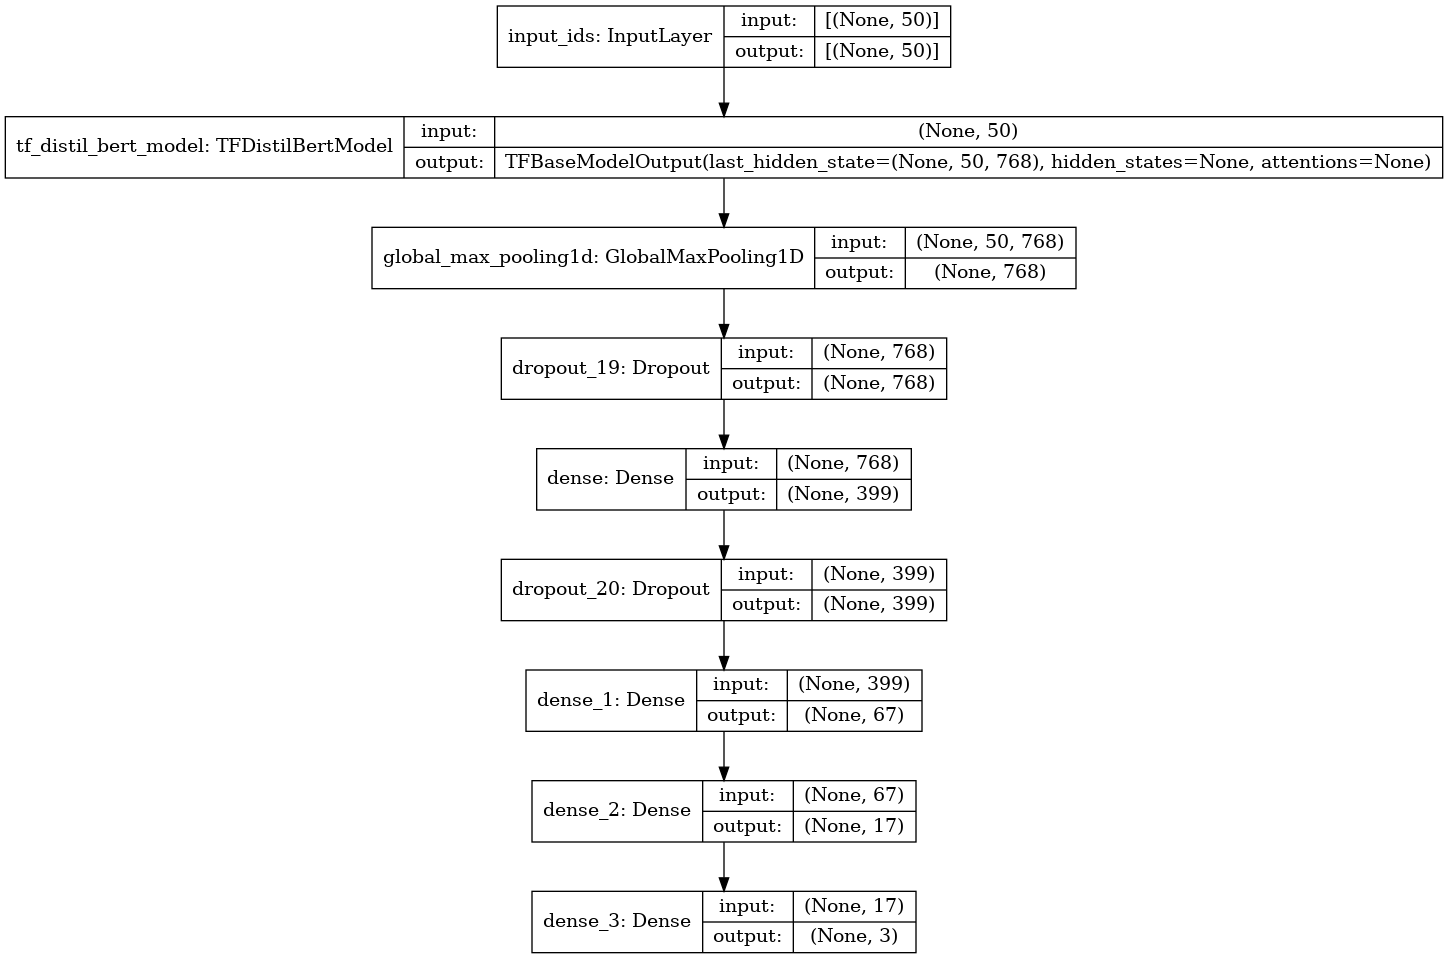

In [31]:
utils.plot_model(nn,show_shapes=True)

In [32]:
nn.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
nn.fit(

    x={'input_ids':x_train['input_ids']},
    y=y_train,
    validation_split=0.20,
    epochs=1,
    batch_size=45

)

2022-07-16 05:45:25.643214: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-07-16 05:45:25.653763: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


654/654 [==============================] - 4081s 6s/step - loss: 0.8826 - accuracy: 0.6098 - val_loss: 0.8137 - val_accuracy: 0.6297


# Working with test data

In [33]:
test_df=test_df.drop(columns=['discourse_id','essay_id','discourse_type'],axis=1)
test_df.head()

,discourse_text
0,Making choices in life can be very difficult. ...
1,Seeking multiple opinions can help a person ma...
2,it can decrease stress levels
3,a great chance to learn something new
4,can be very helpful and beneficial.


In [34]:
x_test=tokenizer(

    text=test_df['discourse_text'].tolist(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_attention_mask=False,
    verbose=True


)

In [35]:
x_test

{'input_ids': <tf.Tensor: shape=(10, 50), dtype=int32, numpy=
array([[  101,  2437,  9804,  1999,  2166,  2064,  2022,  2200,  3697,
         1012,  2111,  2411,  3198,  2005,  6040,  2043,  2027,  2064,
         2025,  5630,  2006,  2028,  2518,  1012,  2009,  1005,  1055,
         2467,  2204,  2000,  3198,  2500,  2005,  2037,  6040,  2043,
         2437,  1037,  3601,  1012,  2043,  2017,  2031,  3674, 10740,
         2017,  2031,  1996,  3754,   102],
       [  101,  6224,  3674, 10740,  2064,  2393,  1037,  2711,  2191,
         1037,  2488,  3601,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [  101,  2009,  2064,  9885,  6911,  3798,   102,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0

In [36]:
predicted=nn.predict({'input_ids':x_test['input_ids']})

In [37]:
predicted

array([[0.03303089, 0.35951263, 0.6074565 ],
       [0.09733398, 0.6689368 , 0.23372927],
       [0.08764511, 0.622518  , 0.28983685],
       [0.08565562, 0.5963481 , 0.31799626],
       [0.1172531 , 0.6995788 , 0.18316801],
       [0.02915141, 0.29074872, 0.68009984],
       [0.05031464, 0.4702964 , 0.47938898],
       [0.14999941, 0.7229919 , 0.12700872],
       [0.04978271, 0.40017754, 0.5500397 ],
       [0.04916247, 0.4347753 , 0.5160623 ]], dtype=float32)

In [38]:
sub_df=sub_df.drop(columns=['Adequate','Ineffective','Effective'],axis=1)
sub_df

,discourse_id
0,a261b6e14276
1,5a88900e7dc1
2,9790d835736b
3,75ce6d68b67b
4,93578d946723
5,2e214524dbe3
6,84812fc2ab9f
7,c668ff840720
8,739a6d00f44a
9,bcfae2c9a244


In [39]:
sub_df['Ineffective'] = predicted[:,0]
sub_df['Adequate'] = predicted[:,1]
sub_df['Effective'] = predicted[:,2]
sub_df

,discourse_id,Ineffective,Adequate,Effective
0,a261b6e14276,0.033031,0.359513,0.607457
1,5a88900e7dc1,0.097334,0.668937,0.233729
2,9790d835736b,0.087645,0.622518,0.289837
3,75ce6d68b67b,0.085656,0.596348,0.317996
4,93578d946723,0.117253,0.699579,0.183168
5,2e214524dbe3,0.029151,0.290749,0.680100
6,84812fc2ab9f,0.050315,0.470296,0.479389
7,c668ff840720,0.149999,0.722992,0.127009
8,739a6d00f44a,0.049783,0.400178,0.550040
9,bcfae2c9a244,0.049162,0.434775,0.516062


In [40]:
sub_df.to_csv('feedback_prize_1.csv',index=None)